<a href="https://colab.research.google.com/github/pandyah5/aps360-project/blob/main/baseline/cv2_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# download the dataset

from google.colab import files
files.upload() # expire any previous token(s) and upload recreated token

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download andrewmvd/face-mask-detection
!unzip -q face-mask-detection.zip -d face-mask-detection # outputs supressed

Saving kaggle.json to kaggle.json
face-mask-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import cv2
from google.colab.patches import cv2_imshow

# enable auto debugger
%pdb on  

Automatic pdb calling has been turned ON


In [39]:
def get_bbox(image, threshold):
  gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)
  
  canny_output = cv2.Canny(gray, threshold, threshold * 2)

  # cv2_imshow(canny_output)
  
  contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  print("Number of contours:" + str(len(contours)))
  
  for contour in contours:
    poly = cv2.approxPolyDP(contour, 3, True)
    x,y,w,h = cv2.boundingRect(poly)
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 3)
  
  cv2_imshow(image)

threshold:  0
Number of contours:4889


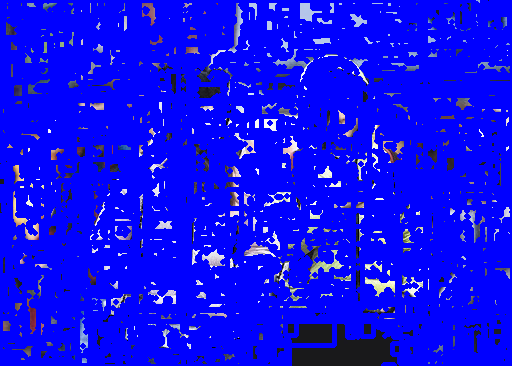

threshold:  10
Number of contours:4202


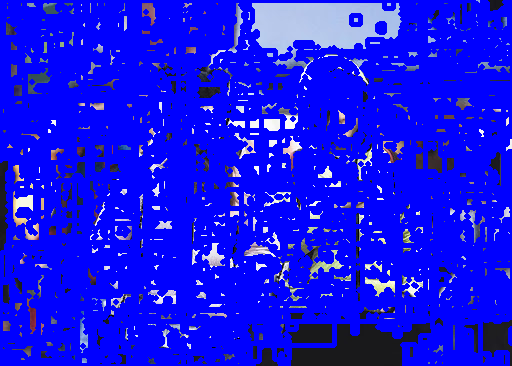

threshold:  20
Number of contours:3293


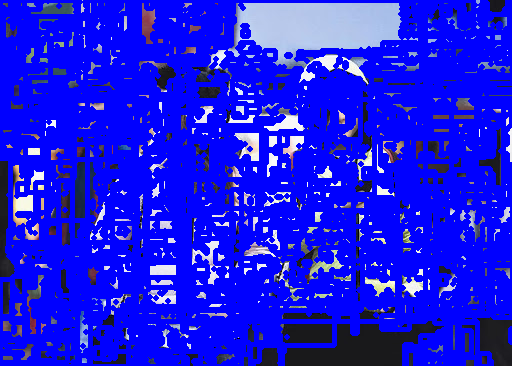

threshold:  30
Number of contours:2710


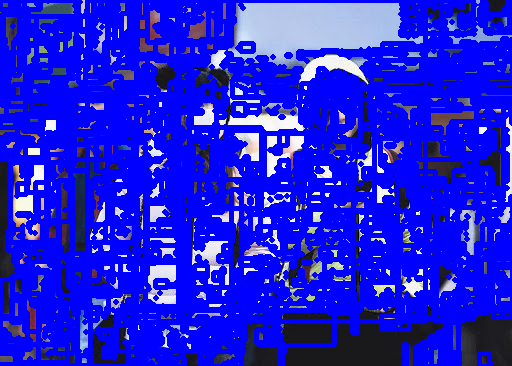

threshold:  40
Number of contours:2268


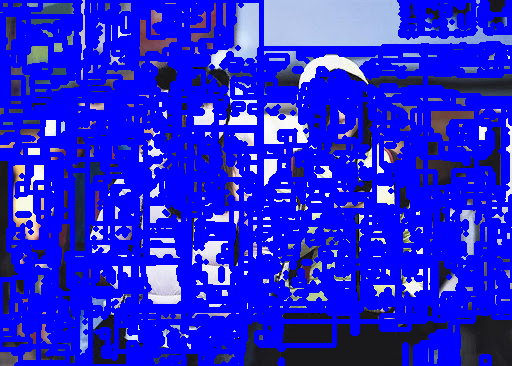

threshold:  50
Number of contours:1869


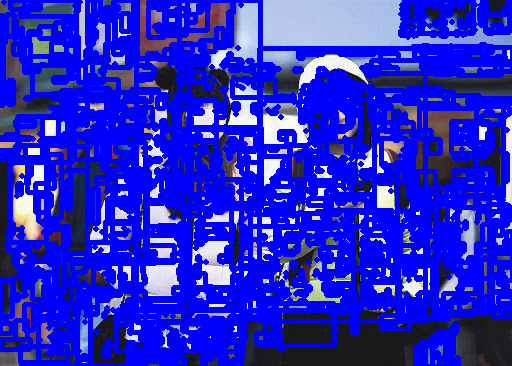

threshold:  60
Number of contours:1570


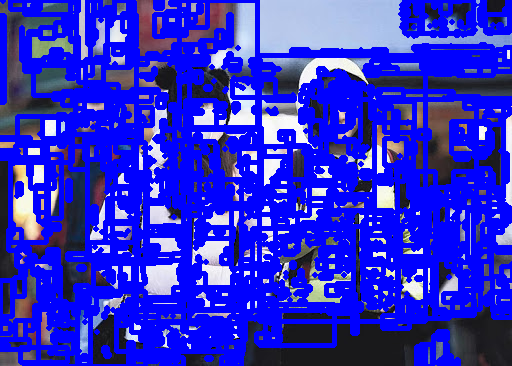

threshold:  70
Number of contours:1316


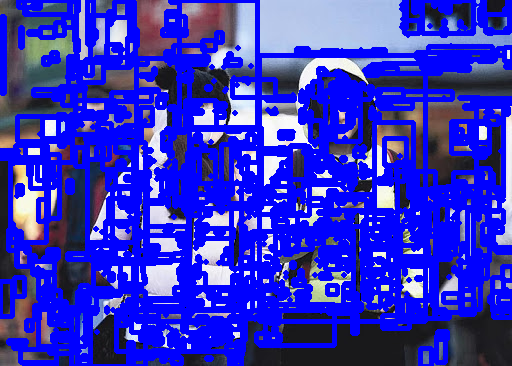

threshold:  80
Number of contours:1123


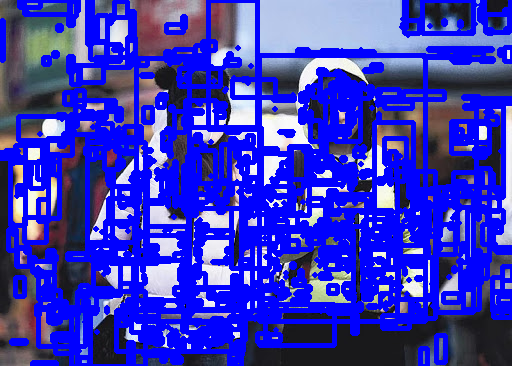

threshold:  90
Number of contours:946


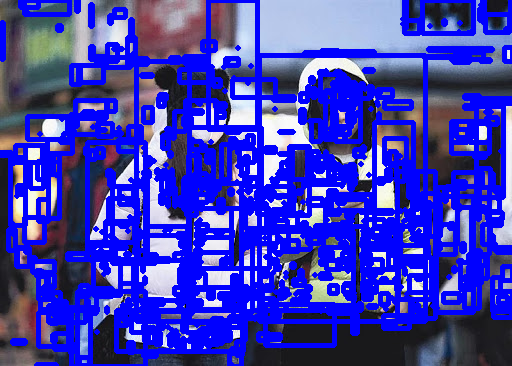

threshold:  100
Number of contours:811


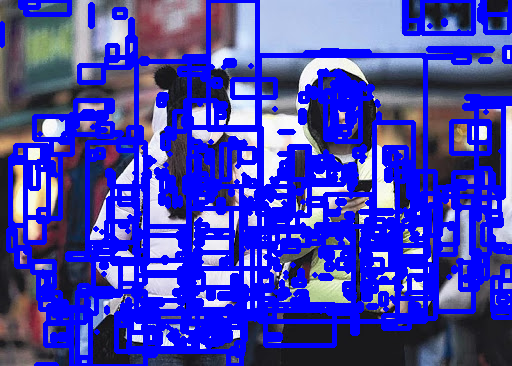

threshold:  110
Number of contours:702


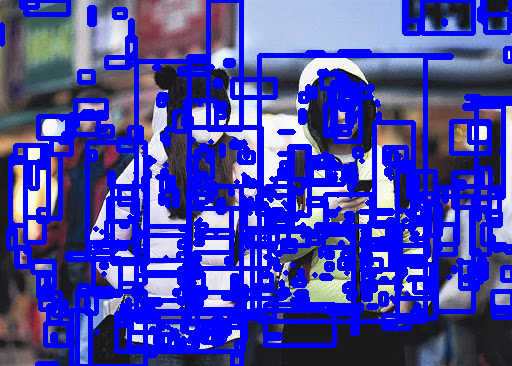

threshold:  120
Number of contours:605


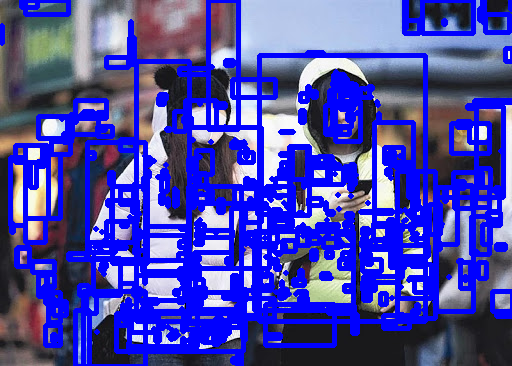

threshold:  130
Number of contours:557


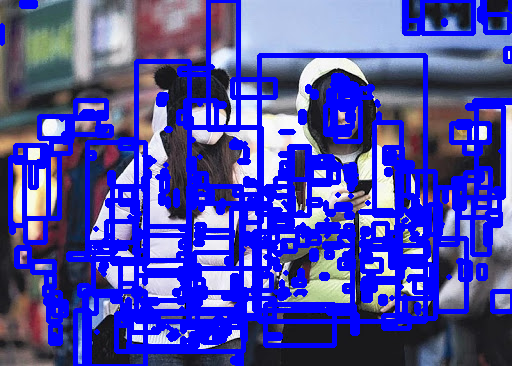

threshold:  140
Number of contours:494


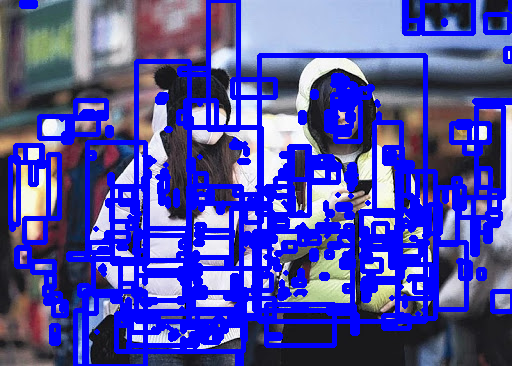

threshold:  150
Number of contours:441


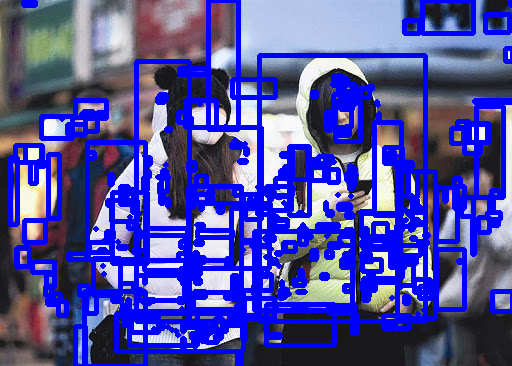

threshold:  160
Number of contours:371


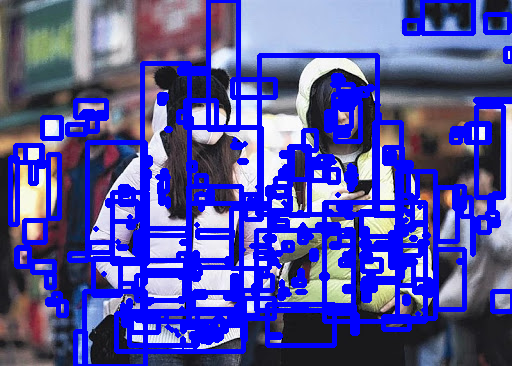

threshold:  170
Number of contours:335


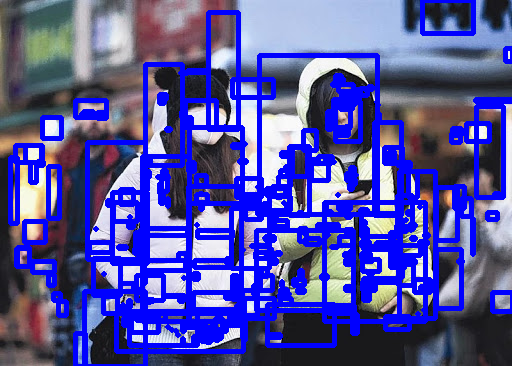

threshold:  180
Number of contours:298


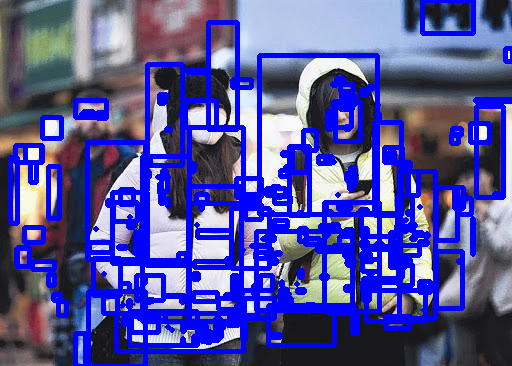

threshold:  190
Number of contours:284


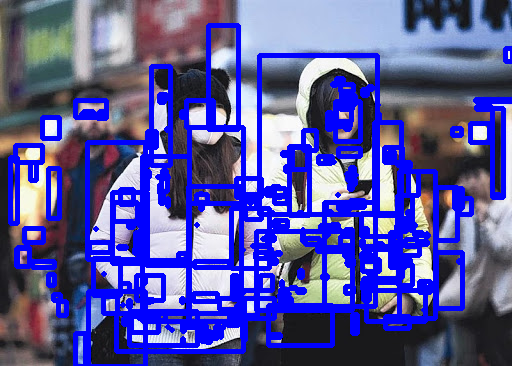

threshold:  200
Number of contours:254


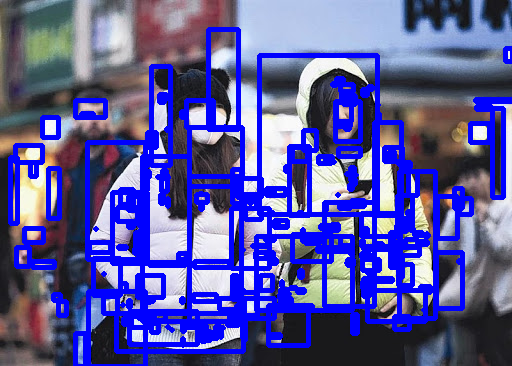

threshold:  210
Number of contours:232


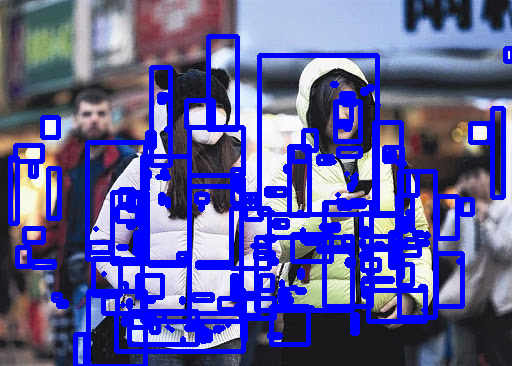

threshold:  220
Number of contours:210


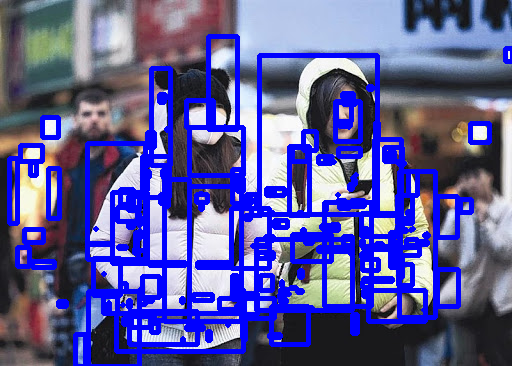

threshold:  230
Number of contours:187


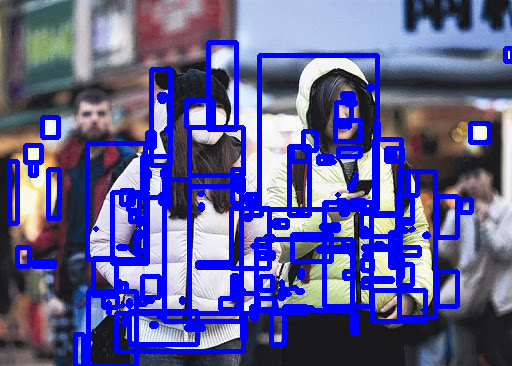

threshold:  240
Number of contours:177


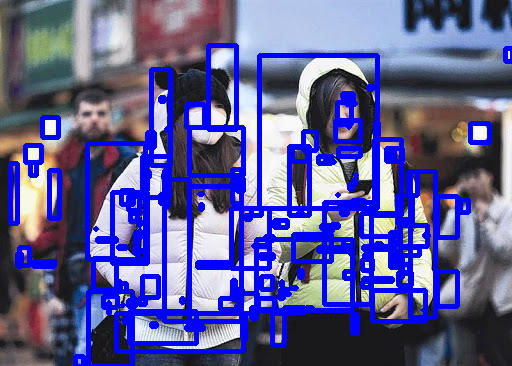

In [42]:


for thres in range(0, 250, 10):
  print("threshold: ", thres)
  image = cv2.imread("/content/face-mask-detection/images/maksssksksss0.png")
  get_bbox(image, thres)